In [1]:
!pip install category_encoders
from category_encoders.leave_one_out import LeaveOneOutEncoder

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

import joblib

You should consider upgrading via the 'c:\users\akasirajan\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
data = pd.read_csv('C:\Flask Demo\car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
category_column = data.select_dtypes(exclude = np.number).columns
numeric_column = data.select_dtypes(include = np.number).drop(columns="Selling_Price").columns

In [6]:
category_pipe = Pipeline(steps=[('encode', LeaveOneOutEncoder())])
numeric_pipe = Pipeline(steps=[('scale', StandardScaler())])

In [7]:
preprocessing_pipe = ColumnTransformer([('cat_pipe', category_pipe, category_column),
                                        ('numeric_pipe', numeric_pipe, numeric_column)])

pipe = Pipeline([('preprocess',preprocessing_pipe),
                 ('linearRegression',LinearRegression())])


X = data.drop(columns="Selling_Price")
y = data["Selling_Price"]

pipe.fit(X,y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_pipe',
                                                  Pipeline(steps=[('encode',
                                                                   LeaveOneOutEncoder())]),
                                                  Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')),
                                                 ('numeric_pipe',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  Index(['Year', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object'))])),
                ('linearRegression', LinearRegression())])

In [8]:
X['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [9]:
test_data = pd.DataFrame(["ritz", 2013, 5.60,50000,"Petrol","Dealer","Manual",0]).T
test_data.columns = X.columns

#Dump model
joblib.dump(pipe, "pipe.pkl")

#Predicting test data
pipe.predict(test_data)

array([2.92294319])

### Encoding

In [10]:
# encoding "Fuel_Type" Column
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [11]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [12]:
X = data.drop(['Car_Name','Selling_Price'],axis=1)
Y = data['Selling_Price']

In [13]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=100)

R squared error :  0.8887737298938332
Mean Absolute Error :  1.1813391721277822
Mean squared error :  3.095631211842412
Root Mean squared error :  1.7594405962812192


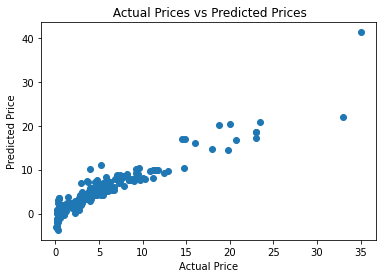

In [15]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)

training_data_prediction = lin_reg_model.predict(X_train)
#-------------------------------------------------------------------------------------------------
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

# Mean Squared Error
score_3 = metrics.mean_squared_error(Y_train, training_data_prediction)

# Root Mean squared Error
score_4 = np.sqrt(score_3)
#-------------------------------------------------------------------------------------------------
print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print("Mean squared error : ", score_3)
print('Root Mean squared error : ', score_4)
#-------------------------------------------------------------------------------------------------
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

R squared error :  0.7025531145008295
Mean Absolute Error :  1.3449660205347058
Mean squared error :  4.2012570043008886
Root Mean squared error :  2.049696807896448


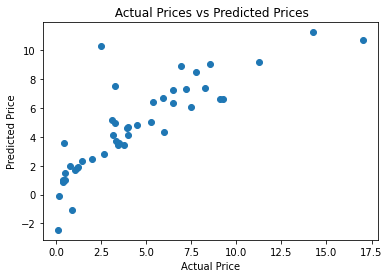

In [16]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)
#-------------------------------------------------------------------------------------------------
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

# Mean Squared Error
score_3 = metrics.mean_squared_error(Y_test, test_data_prediction)

# Root Mean squared Error
score_4 = np.sqrt(score_3)
#-------------------------------------------------------------------------------------------------

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print("Mean squared error : ", score_3)
print('Root Mean squared error : ', score_4)
#-------------------------------------------------------------------------------------------------
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

R squared error :  0.8512958717756678
Mean Absolute Error :  1.2480700962384224
Mean squared error :  4.138708780054075
Root Mean squared error :  2.0343816702020483


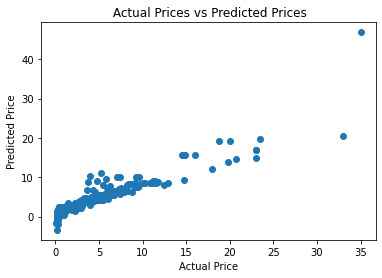

In [17]:
lass_reg_model = Lasso() # loading the linear regression model
lass_reg_model.fit(X_train,Y_train)
training_data_prediction = lass_reg_model.predict(X_train)
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

# Mean Squared Error
score_3 = metrics.mean_squared_error(Y_train, training_data_prediction)

# Root Mean squared Error
score_4 = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print("Mean squared error : ", score_3)
print('Root Mean squared error : ', score_4)

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

R squared error :  0.7528768345961181
Mean Absolute Error :  1.2993284980553674
Mean squared error :  3.4904649542244464
Root Mean squared error :  1.868278607227639


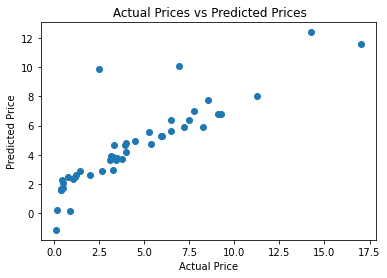

In [18]:
test_data_prediction = lass_reg_model.predict(X_test)

# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

# Mean Squared Error
score_3 = metrics.mean_squared_error(Y_test, test_data_prediction)

# Root Mean squared Error
score_4 = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print("Mean squared error : ", score_3)
print('Root Mean squared error : ', score_4)

plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()